In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')



In [2]:
df=pd.read_csv("delivery_time.csv")

In [3]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [46]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [6]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [36]:
df.skew

<bound method DataFrame.skew of     Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

In [37]:
df.mean

<bound method DataFrame.mean of     Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

In [38]:
df['Delivery Time'].mean()

16.79095238095238

In [39]:
df['Sorting Time'].mean()

6.190476190476191

In [40]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [41]:
df.median()

Delivery Time    17.83
Sorting Time      6.00
dtype: float64

In [42]:
df.var()

Delivery Time    25.754619
Sorting Time      6.461905
dtype: float64

In [43]:
df.std

<bound method DataFrame.std of     Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

In [45]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [7]:
x=df["Delivery Time"]
y=df["Sorting Time"]

<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

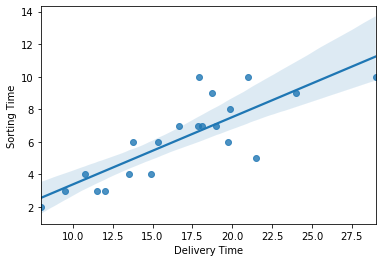

In [8]:
sns.regplot(x='Delivery Time',y='Sorting Time',data=df)

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

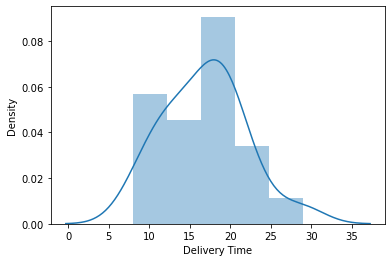

In [9]:
sns.distplot(df['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

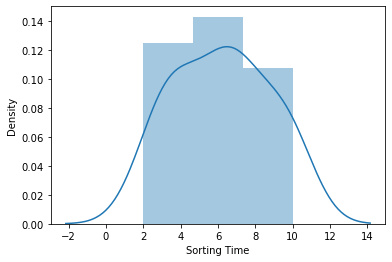

In [10]:
sns.distplot(df['Sorting Time'])

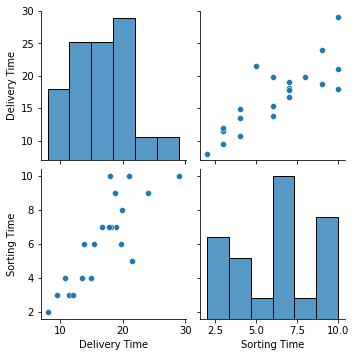

In [47]:
sns.set_style=('darkgrid')
sns.pairplot(df)

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

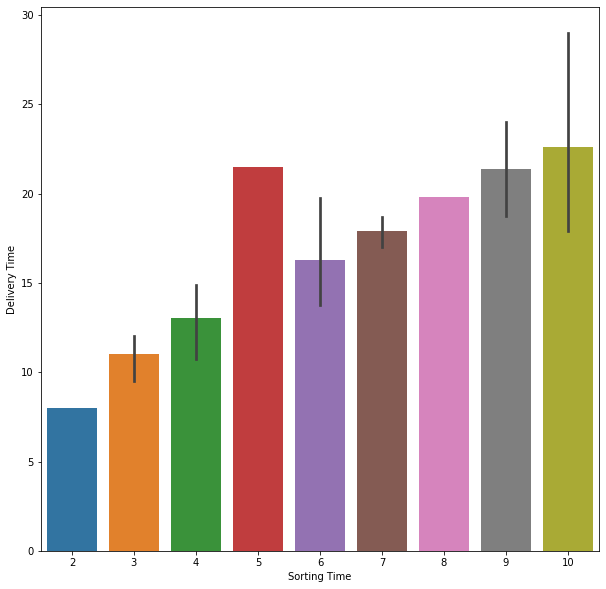

In [48]:
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize=(10,10))
sns.barplot(x='Sorting Time',y='Delivery Time',data=df)

In [4]:
import matplotlib.pyplot as plt

In [11]:
import statsmodels.formula.api as smf
model=smf.ols("y~x",data=df).fit()

In [12]:
model.params

Intercept   -0.756673
x            0.413744
dtype: float64

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 11 May 2021   Prob (F-statistic):           3.98e-06
Time:                        21:37:55   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7567      1.134     -0.667      0.513      -3.130       1.617
x              0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model_influence=model.get_influence() 

In [15]:
(c,_)=model_influence.cooks_distance

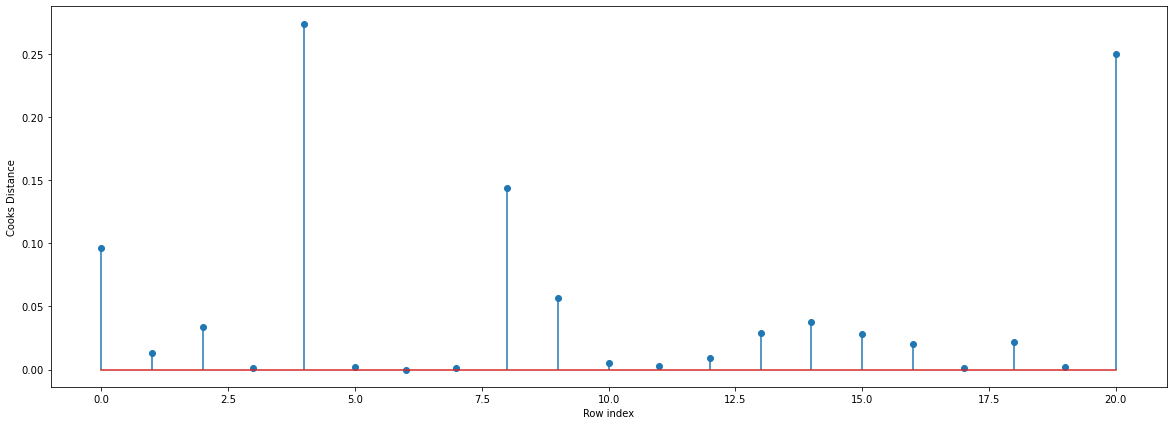

In [16]:
import matplotlib.pyplot as plt
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [17]:
(np.argmax(c),np.max(c))

(4, 0.2735659105689643)

In [18]:
k=df.shape[1]
n=df.shape[0]
levarage_cutoff=3*((k + 1)/n)

In [19]:
df[df.index.isin([0,4,7,8,9,11,15,16,17,20])]

,Delivery Time,Sorting Time
0,21.00,10
4,29.00,10
7,9.50,3
8,17.90,10
9,18.75,9
11,10.75,4
15,14.88,4
16,13.75,6
17,18.11,7
20,21.50,5


In [20]:
df.median()

Delivery Time    17.83
Sorting Time      6.00
dtype: float64

In [21]:
df.head(10)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [22]:
df2=df

In [23]:
df3=df2.drop(df2.index[[0,4,7,8,9,11,15,16,17,20]],axis=0)

In [24]:
df3

,Delivery Time,Sorting Time
1,13.50,4
2,19.75,6
3,24.00,9
5,15.35,6
6,19.00,7
10,19.83,8
12,16.68,7
13,11.50,3
14,12.03,3
18,8.00,2


In [25]:
y1=df3['Delivery Time']
x1=df3['Sorting Time']

In [26]:
model_4=smf.ols("y1~x1",data=df3).fit()

In [27]:
df3

,Delivery Time,Sorting Time
1,13.50,4
2,19.75,6
3,24.00,9
5,15.35,6
6,19.00,7
10,19.83,8
12,16.68,7
13,11.50,3
14,12.03,3
18,8.00,2


In [28]:
y2=df3['Delivery Time']
x2=df3['Sorting Time']

In [29]:
model5=smf.ols("y2~x2",data=df3).fit()

In [30]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     80.67
Date:                Tue, 11 May 2021   Prob (F-statistic):           8.68e-06
Time:                        21:38:10   Log-Likelihood:                -19.238
No. Observations:                  11   AIC:                             42.48
Df Residuals:                       9   BIC:                             43.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3947      1.282      4.207      0.002       2.494       8.296
x2             1.9053      0.212      8.981      0.000       1.425       2.385
==============================================================================
Omnibus:                        0.822   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.663   Jarque-Bera (JB):                0.524
Skew:                           0.479   Prob(JB):                        0.770
Kurtosis:                       2.527   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
final_model=model5

In [32]:
newdata=pd.Series([8]) 

In [33]:
data_pred=pd.DataFrame(newdata,columns=['x2']) 

In [34]:
final_model.predict(data_pred)

0    20.637059
dtype: float64